<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/City_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### **Import Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### **Loading the data**

In [0]:
cab=pd.read_csv("/content/drive/My Drive/Case_Study (1)/Case_Study/Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DAY
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Fri
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Wed
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Sat
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Thu
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Sun


In [0]:
tranx=pd.read_csv("/content/drive/My Drive/Case_Study (1)/Case_Study/Transaction_ID.csv")
tranx.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [0]:
tranx[tranx['Customer ID']==20645]

,Transaction ID,Customer ID,Payment_Mode


In [0]:
city=pd.read_csv("/content/drive/My Drive/Case_Study (1)/Case_Study/City.csv")
city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [0]:
cus=pd.read_csv("/content/drive/My Drive/Case_Study (1)/Case_Study/Customer_ID.csv")
cus.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [0]:
cus.Gender.value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

### **Merging The different DataFrames**

In [0]:
data=pd.merge(cab,tranx)
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DAY,Customer ID,Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Fri,29290,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Wed,27703,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Sat,28712,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Thu,28020,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Sun,27182,Card


In [0]:
data=pd.merge(data,cus)
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DAY,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Fri,29290,Card,Male,28,10813
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Wed,27703,Card,Male,27,9237
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Sat,28712,Cash,Male,53,11242
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Thu,28020,Cash,Male,23,23327
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Sun,27182,Card,Male,33,8536


In [0]:
data.rename({"Income (USD/Month)":"Income"},axis=1,inplace=True)
data.rename({"Date of Travel":"Date"},axis=1,inplace=True)

In [0]:
data_fnl=pd.merge(data,city)

In [0]:
for col in ["Population","Users"]:
    data_fnl[col]=data_fnl[col].str.replace(",","")

In [0]:
for col in ["Population","Users"]:
    data_fnl[col]=pd.to_numeric(data_fnl[col])

In [0]:
data=data_fnl.copy()
data

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,DAY,Customer ID,Payment_Mode,Gender,Age,Income,Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Fri,29290,Card,Male,28,10813,814885,24701
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Wed,27703,Card,Male,27,9237,814885,24701
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Sat,28712,Cash,Male,53,11242,814885,24701
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Thu,28020,Cash,Male,23,23327,814885,24701
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Sun,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,10001746,18-01-2016,Pink Cab,WASHINGTON DC,10.71,104.64,112.455,Mon,52973,Cash,Male,30,7678,418859,127001
1554,10001747,17-01-2016,Pink Cab,WASHINGTON DC,22.80,224.91,262.200,Sun,51237,Card,Male,36,23485,418859,127001
1555,10001748,14-01-2016,Pink Cab,WASHINGTON DC,33.66,325.71,360.162,Thu,51900,Card,Male,27,2588,418859,127001
1556,10001749,18-01-2016,Pink Cab,WASHINGTON DC,24.25,232.38,242.500,Mon,53438,Card,Male,29,20421,418859,127001


In [0]:

data.drop(["Date"],axis=1,inplace=True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1557
Data columns (total 14 columns):
Transaction ID    1558 non-null int64
Company           1558 non-null object
City              1558 non-null object
KM Travelled      1558 non-null float64
Price Charged     1558 non-null float64
Cost of Trip      1558 non-null float64
DAY               1558 non-null object
Customer ID       1558 non-null int64
Payment_Mode      1558 non-null object
Gender            1558 non-null object
Age               1558 non-null int64
Income            1558 non-null int64
Population        1558 non-null int64
Users             1558 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 182.6+ KB



## **UNIVARIATE**

### **count of cabs**

Yellow Cab    1104
Pink Cab       454
Name: Company, dtype: int64


Yellow Cab    70.860077
Pink Cab      29.139923
Name: Company, dtype: float64


Text(0.5, 1.0, 'Cabs used by customer')

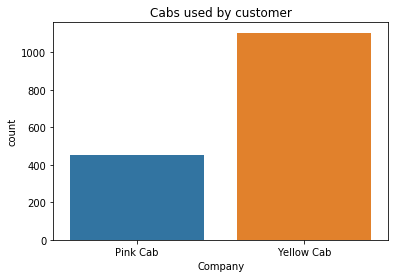

In [0]:
sns.countplot("Company",data=data)
print(data.Company.value_counts())
print("\n")
print((data.Company.value_counts(normalize=True))*100)
plt.title("Cabs used by customer")

through ploting we came to know that the count of cabs are pink= 454 and yellow=1104 cabs

### **Cabs used by Customers per  day**

Sat    418
Sun    394
Thu    200
Fri    165
Wed    150
Mon    125
Tue    106
Name: DAY, dtype: int64


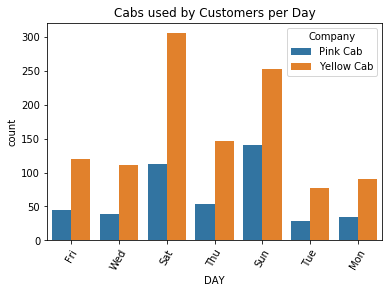

In [0]:
print(data.DAY.value_counts())
sns.countplot("DAY",data=data,hue="Company")
plt.xticks(rotation=60)
plt.title("Cabs used by Customers per Day")
plt.show()

maximum cabs are utilizing by the users on weekends in both the companies and in weekdays almost same number of users are using.

**Cabs used by Customers by PaymentMode**

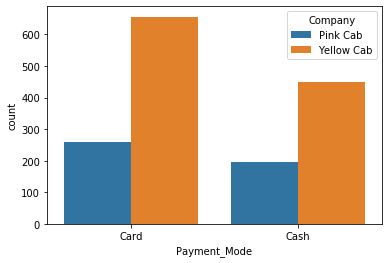

In [0]:
sns.countplot("Payment_Mode",data=data,hue="Company")
plt.show()

Through plotting we came to now that the customers are paying maximum through card
Card    914
than
Cash    644

## Company Cabs used by Customers 

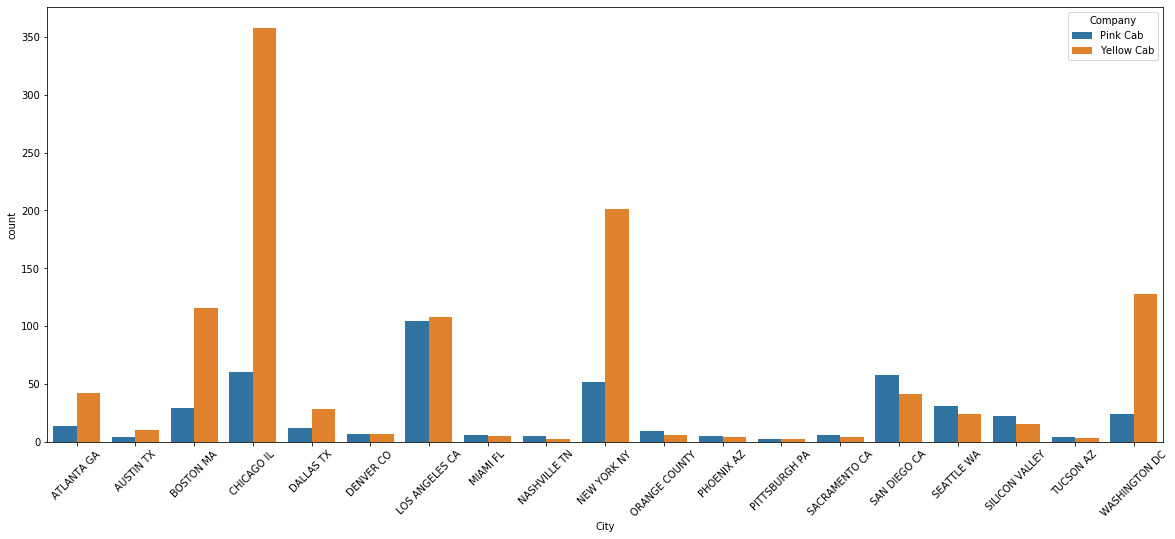

In [0]:
plt.figure(figsize=(20,8))
sns.countplot(x="City",data=data,hue="Company")
plt.xticks(rotation=45)
plt.show()

from above figure we came to know that maximum yellow cabs using from the cities (NewYork, Chicago, Boston,Washington, LosAngeles) and from the company pink cabs moreover Sacramento and other cities as same as like yellow cabs

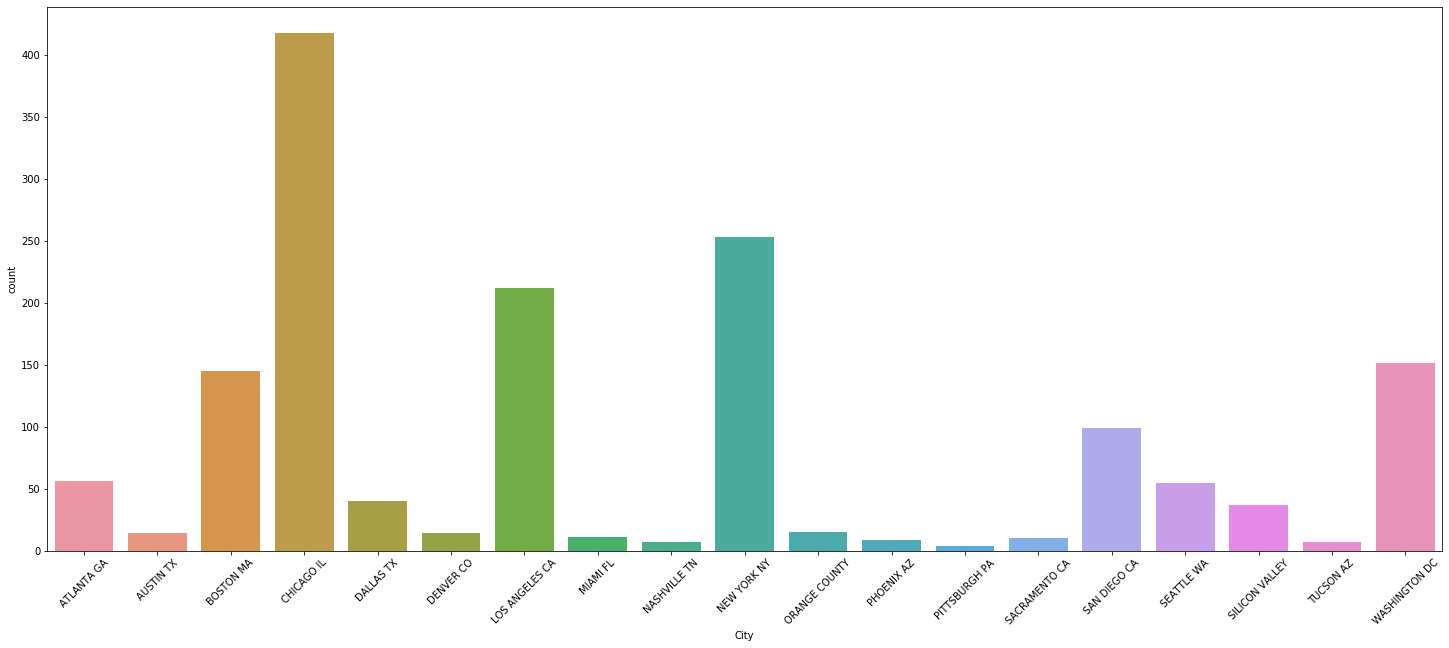

In [0]:
plt.figure(figsize=(25,10))
sns.countplot("City",data=data)
plt.xticks(rotation=45)
plt.show()

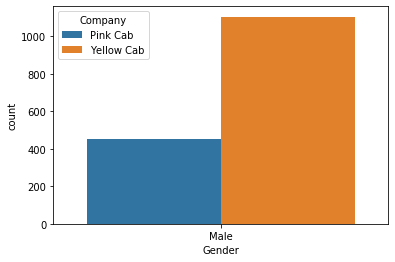

In [0]:
sns.countplot("Gender",hue="Company",data=data)

### **AGE**

In [0]:
data['Aged'] = pd.cut(x=data['Age'], bins=[10,20, 30, 40, 50,60,70], labels=["10-20",'20-30', '30-40', '40-50',"50-60","60-70"])

continuous variable Age converted to categorical data 

In [0]:
data.Aged.value_counts()

20-30    510
30-40    476
10-20    172
40-50    159
50-60    158
60-70     83
Name: Aged, dtype: int64

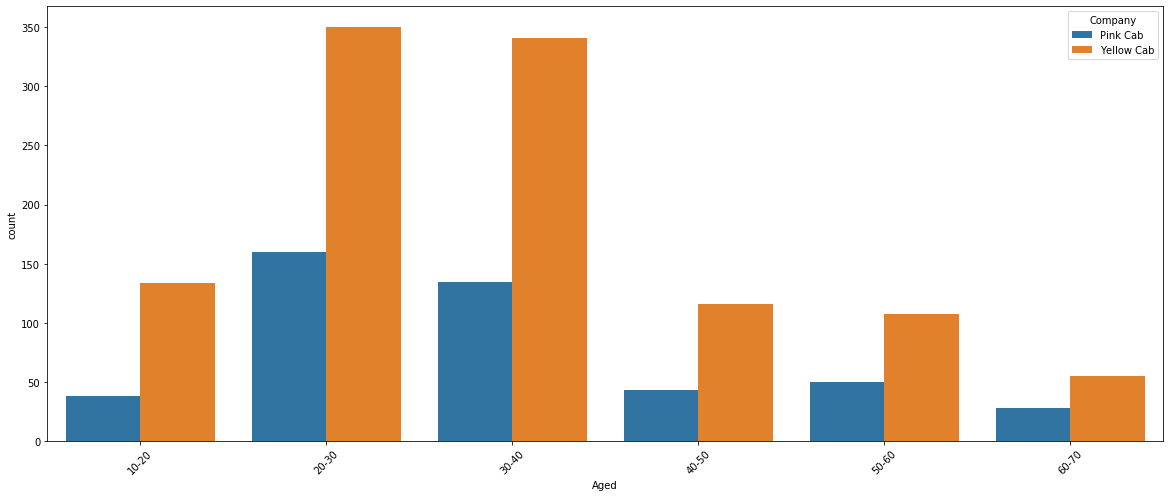

In [0]:
plt.figure(figsize=(20,8))
sns.countplot(x="Aged",data=data,hue="Company")
plt.xticks(rotation=45)
plt.show()

maximums cabs are using by the 20 to 40 age group in both the companies least using by the 10 to 20 and more than 40 age group

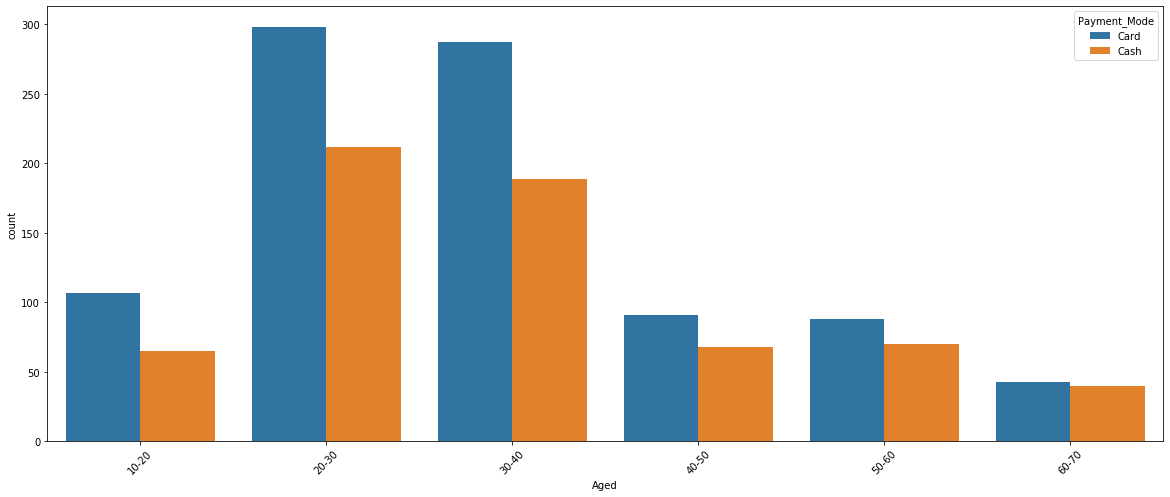

In [0]:
plt.figure(figsize=(20,8))
sns.countplot(x="Aged",data=data,hue="Payment_Mode")
plt.xticks(rotation=45)
plt.show()

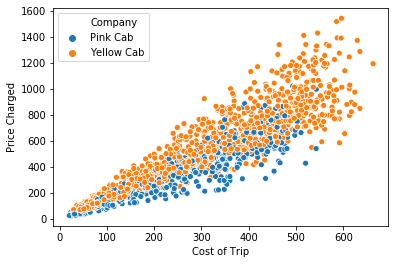

In [0]:
sns.scatterplot("Cost of Trip","Price Charged",data=data,hue="Company")

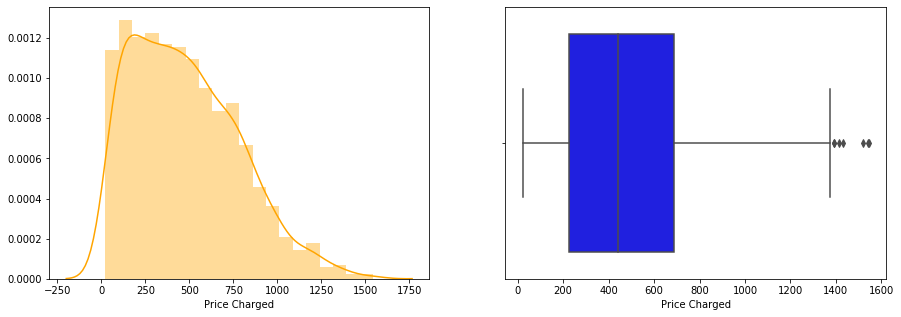

In [0]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.distplot(data["Price Charged"],color="orange",ax=ax1)
sns.boxplot(data["Price Charged"],color="blue",ax=ax2)


count     1558.000000
mean     14872.437099
std       7953.293530
min       2035.000000
25%       8145.250000
50%      14635.500000
75%      20797.250000
max      34968.000000
Name: Income, dtype: float64


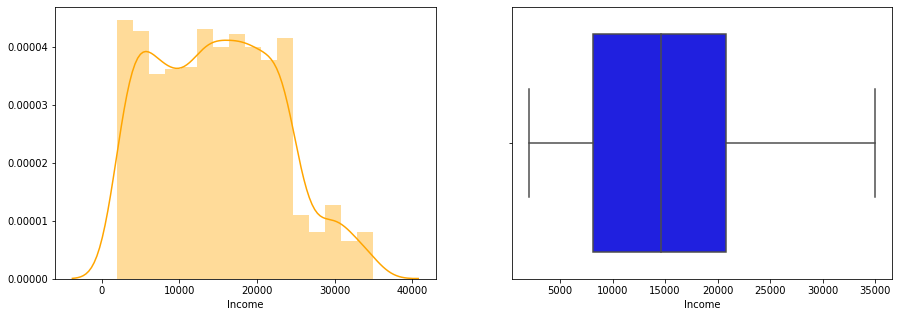

In [0]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
print(data.Income.describe())
sns.distplot(data["Income"],color="orange",ax=ax1)
sns.boxplot(x="Income",color="blue",data=data,ax=ax2)
plt.show()

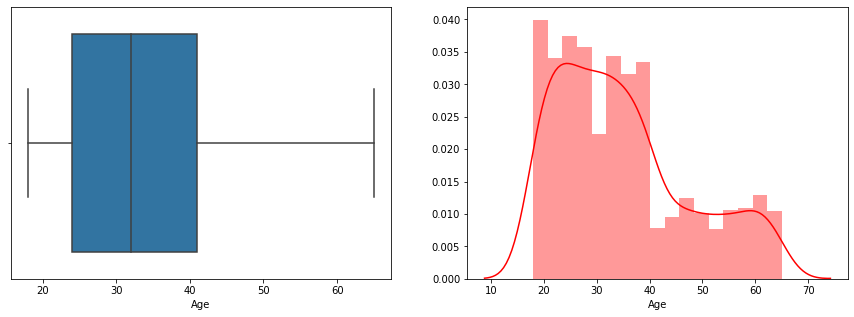

In [0]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.boxplot("Age",data=data,ax=ax1)
sns.distplot(data["Age"],color="red",ax=ax2)


### BIVARIATE

In [0]:
x=pd.crosstab(data["City"],data["Aged"])
x

Aged,10-20,20-30,30-40,40-50,50-60,60-70
City,,,,,,
ATLANTA GA,7,23,15,5,3,3
AUSTIN TX,2,3,3,1,5,0
BOSTON MA,11,49,41,11,25,8
CHICAGO IL,49,126,130,56,38,19
DALLAS TX,5,13,9,3,9,1
DENVER CO,1,6,2,2,2,1
LOS ANGELES CA,25,69,60,23,19,16
MIAMI FL,1,1,4,3,2,0
NASHVILLE TN,0,4,0,2,1,0


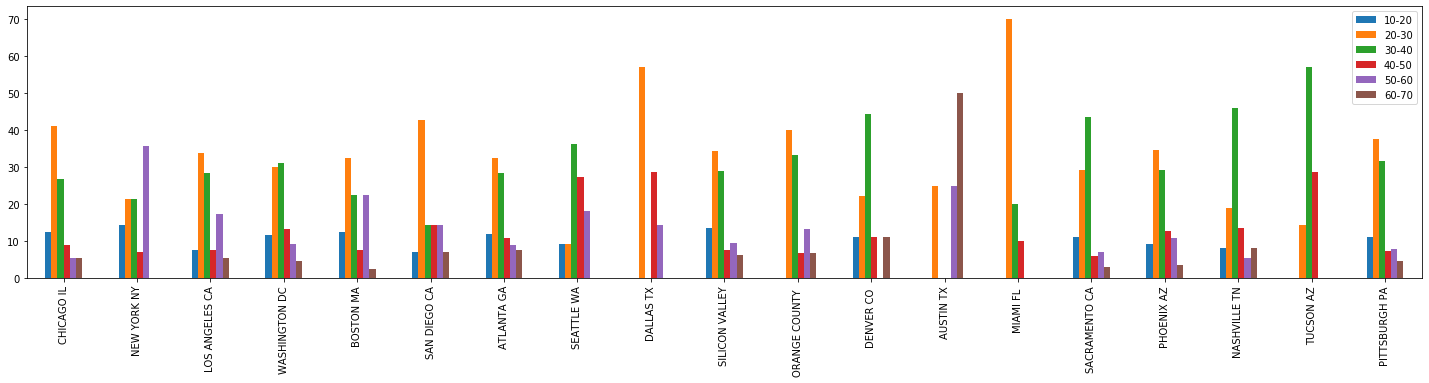

In [0]:
pd.DataFrame(np.array(x)*100/np.array(np.sum(x,axis=1)).reshape(19,1),columns=["10-20",'20-30', '30-40', '40-50',"50-60","60-70"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).plot.bar(figsize=(25,5))

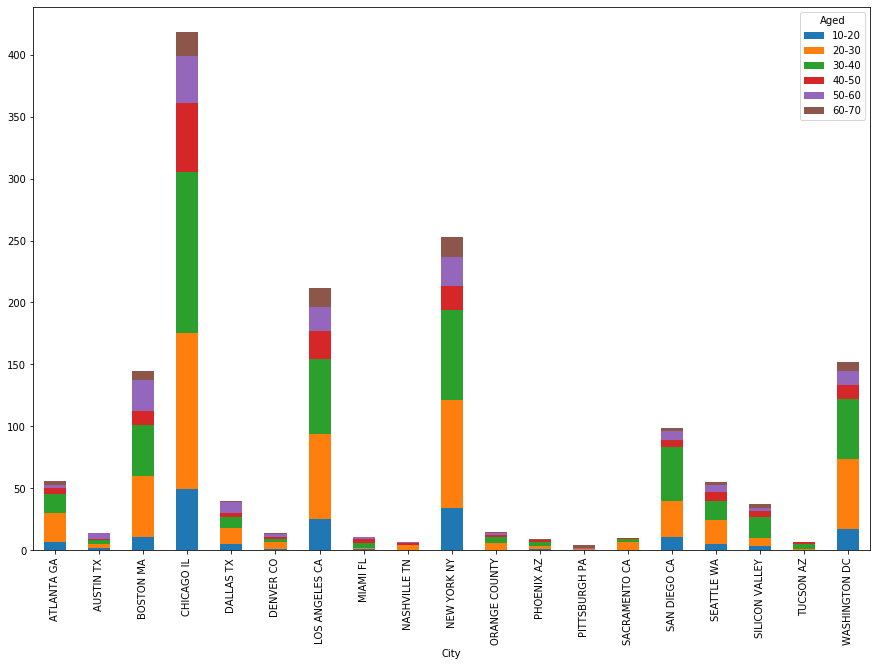

In [0]:
pd.crosstab(data["City"],data["Aged"]).plot.bar(stacked=True,figsize=(15,10))


In [0]:
p=pd.crosstab(data[data.Company=='Pink Cab']["City"],data[data.Company=='Pink Cab']["Aged"])
R=pd.DataFrame(np.array(p)*100/np.array(np.sum(p,axis=1)).reshape(19,1),columns=["10-20",'20-30', '30-40', '40-50',"50-60","60-70"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).mean()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
Agegrp=["10-20",'20-30', '30-40', '40-50',"50-60","60-70"]
values = R
fig = go.Figure(data=[go.Pie(labels=Agegrp, values=R)])
fig.show()


y=pd.crosstab(data[data.Company=='Yellow Cab']["City"],data[data.Company=='Yellow Cab']["Aged"])
S=pd.DataFrame(np.array(y)*100/np.array(np.sum(y,axis=1)).reshape(19,1),columns=["10-20",'20-30', '30-40', '40-50',"50-60","60-70"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).mean()
import plotly.graph_objects as go

Agegrp=["10-20",'20-30', '30-40', '40-50',"50-60","60-70"]
values = S
fig.update_layout(height=100, width=100)
fig = go.Figure(data=[go.Pie(labels=Agegrp, values=S)])
fig.show()

In [0]:
data['cpkm']=data["Cost of Trip"]/data["KM Travelled"]
data['chargedkm']=data["Price Charged"]/data["KM Travelled"]
data["pop_per"]=(data["Users"]/data["Population"])*100
data["Profit"]=data["Price Charged"]-data["Cost of Trip"]

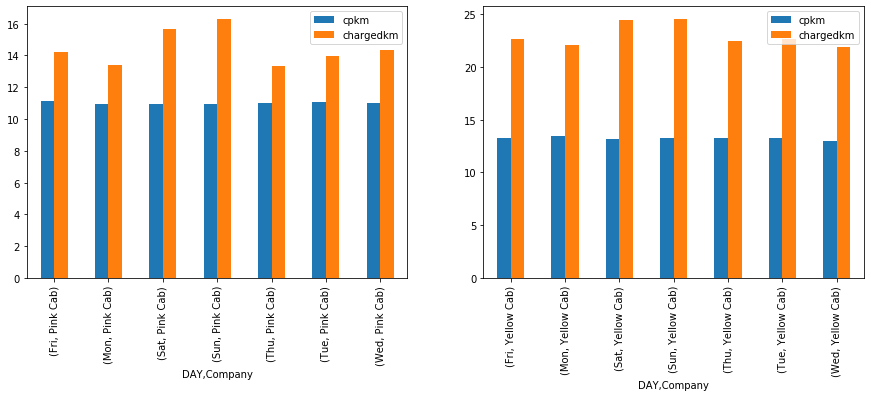

In [0]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
df1=data[data.Company=='Pink Cab']
df1.groupby(['DAY',"Company"])["cpkm","chargedkm"].mean().plot(kind='bar',ax=ax1)
df2=data[data.Company=='Yellow Cab']
df2.groupby(['DAY',"Company"])["cpkm","chargedkm"].mean().plot(kind='bar',ax=ax2)

In [0]:
df1=data[data.Company=='Pink Cab']
f=pd.crosstab(df1['City'],df1['DAY'],values=df1['cpkm'],aggfunc='mean')
R=pd.DataFrame(np.array(f)*100/np.array(np.sum(f,axis=1)).reshape(19,1),columns=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).mean()
df2=data[data.Company=='Yellow Cab']
h=pd.crosstab(df2['City'],df2['DAY'],values=df2['cpkm'],aggfunc='mean')
S=pd.DataFrame(np.array(h)*100/np.array(np.sum(h,axis=1)).reshape(19,1),columns=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).mean()


import plotly.graph_objects as go
from plotly.subplots import make_subplots


Day=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"]
values = R
fig = go.Figure(data=[go.Pie(labels=Day, values=values)])

Day=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"]
values = S
fig = go.Figure(data=[go.Pie(labels=Day, values=values)])
fig.update_layout(height=400, width=400)
fig.show()
fig.show()


In [0]:
df1=data[data.Company=='Pink Cab']
f=pd.crosstab(df1['City'],df1['DAY'],values=df1['chargedkm'],aggfunc='mean')
R=pd.DataFrame(np.array(f)*100/np.array(np.sum(f,axis=1)).reshape(19,1),columns=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).mean()


df2=data[data.Company=='Yellow Cab']
h=pd.crosstab(df2['City'],df2['DAY'],values=df2['chargedkm'],aggfunc='mean')
S=pd.DataFrame(np.array(h)*100/np.array(np.sum(h,axis=1)).reshape(19,1),columns=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"],index=["CHICAGO IL",
"NEW YORK NY","LOS ANGELES CA","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","ATLANTA GA","SEATTLE WA","DALLAS TX","SILICON VALLEY","ORANGE COUNTY " ,"DENVER CO ", 
"AUSTIN TX"   ,"MIAMI FL ", "SACRAMENTO CA","PHOENIX AZ","NASHVILLE TN","TUCSON AZ","PITTSBURGH PA"]).mean()


import plotly.graph_objects as go

Day=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"]
values = R
fig = go.Figure(data=[go.Pie(labels=Day, values=values)])



Day=["Fri",'Mon', 'Sat', 'Sun',"Thu","Tue","Wed"]
values = S
fig = go.Figure(data=[go.Pie(labels=Day, values=S)])
fig.update_layout(height=400, width=400)
fig.show()
fig.show()

City            Population  Users 
ATLANTA GA      814885      24701      3.031225
AUSTIN TX       698371      14978      2.144705
BOSTON MA       248968      80021     32.141078
CHICAGO IL      1955130     164468     8.412126
DALLAS TX       942908      22157      2.349858
DENVER CO       754233      12421      1.646839
LOS ANGELES CA  1595037     144132     9.036279
MIAMI FL        1339155     17675      1.319862
NASHVILLE TN    327225      9270       2.832913
NEW YORK NY     8405837     302149     3.594514
ORANGE COUNTY   1030185     12994      1.261327
PHOENIX AZ      943999      6133       0.649683
PITTSBURGH PA   542085      3643       0.672035
SACRAMENTO CA   545776      7044       1.290639
SAN DIEGO CA    959307      69995      7.296413
SEATTLE WA      671238      25063      3.733847
SILICON VALLEY  1177609     27247      2.313756
TUCSON AZ       631442      5712       0.904596
WASHINGTON DC   418859      127001    30.320705
Name: pop_per, dtype: float64


pop_per    6.050126
dtype: float64

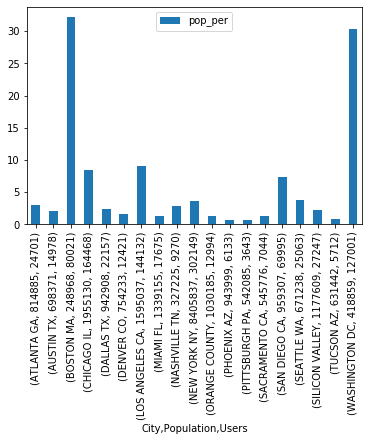

In [0]:
print(data.groupby(['City', "Population","Users"])['pop_per'].mean())
r=data.groupby(['City', "Population","Users"])['pop_per'].mean()
r=pd.DataFrame(r)
r.plot.bar()

96.09361674008808

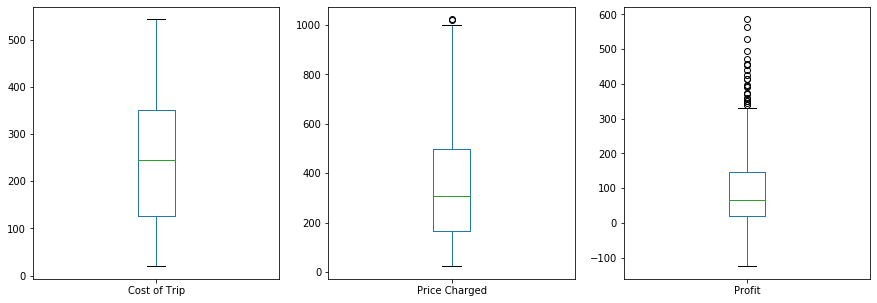

In [0]:
df1=data[data["Company"]=="Pink Cab"]
fig, ((ax1, ax2,ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
df1["Cost of Trip"].plot.box(ax=ax1)
df1["Price Charged"].plot.box(ax=ax2)
df1["Profit"].plot.box(ax=ax3)
df1["Profit"].mean()

In [0]:
df1[df1["Profit"]>350]

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,DAY,Customer ID,Payment_Mode,Gender,Age,Income,Population,Users,Aged,cpkm,chargedkm,pop_per,Profit
687,10000074,Pink Cab,LOS ANGELES CA,46.00,997.84,542.800,Sat,8693,Card,Male,21,15024,1595037,144132,20-30,11.8,21.692174,9.036279,455.040
697,10000084,Pink Cab,LOS ANGELES CA,45.63,1021.72,492.804,Sun,8702,Cash,Male,20,3795,1595037,144132,10-20,10.8,22.391409,9.036279,528.916
702,10000088,Pink Cab,LOS ANGELES CA,41.20,983.99,420.240,Sun,8420,Cash,Male,30,3193,1595037,144132,20-30,10.2,23.883252,9.036279,563.750
706,10000092,Pink Cab,LOS ANGELES CA,37.76,851.25,438.016,Sat,8927,Card,Male,19,17197,1595037,144132,10-20,11.6,22.543697,9.036279,413.234
708,10000093,Pink Cab,LOS ANGELES CA,37.95,870.29,413.655,Sun,7002,Cash,Male,54,24555,1595037,144132,50-60,10.9,22.932543,9.036279,456.635
711,10000097,Pink Cab,LOS ANGELES CA,35.52,744.45,372.960,Wed,6068,Card,Male,33,8788,1595037,144132,30-40,10.5,20.958615,9.036279,371.490
716,10000102,Pink Cab,LOS ANGELES CA,37.05,772.84,422.370,Sun,7277,Cash,Male,23,20528,1595037,144132,20-30,11.4,20.859379,9.036279,350.470
731,10000117,Pink Cab,LOS ANGELES CA,42.84,1022.59,436.968,Sun,6236,Card,Male,61,12821,1595037,144132,60-70,10.2,23.869981,9.036279,585.622
738,10000124,Pink Cab,LOS ANGELES CA,37.10,803.58,408.100,Sat,6465,Card,Male,46,3249,1595037,144132,40-50,11.0,21.659838,9.036279,395.480
739,10000125,Pink Cab,LOS ANGELES CA,36.30,859.70,388.410,Sun,6249,Cash,Male,31,12237,1595037,144132,30-40,10.7,23.683196,9.036279,471.290


profit 233.5809945652175


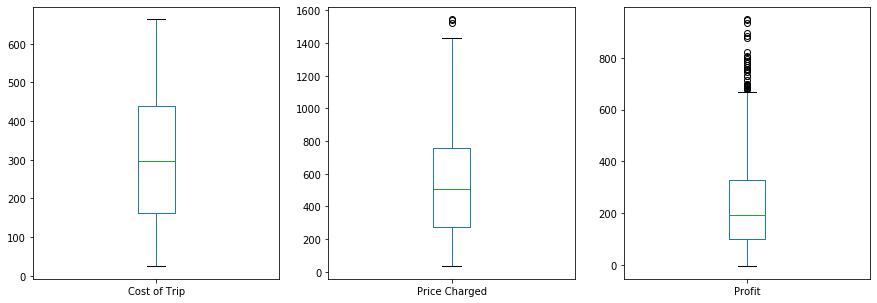

In [0]:
df2=data[data["Company"]=="Yellow Cab"]
fig, ((ax1, ax2,ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
df2["Cost of Trip"].plot.box(ax=ax1)
df2["Price Charged"].plot.box(ax=ax2)
df2["Profit"].plot.box(ax=ax3)
print("profit",df2["Profit"].mean())


In [0]:
df2[df2["Profit"]>600]

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,DAY,Customer ID,Payment_Mode,Gender,Age,Income,Population,Users,Aged,cpkm,chargedkm,pop_per,Profit
6,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,Sat,27602,Card,Male,23,8542,814885,24701,20-30,13.68,39.527557,3.031225,877.0076
7,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,Sat,27594,Cash,Male,28,3901,814885,24701,20-30,12.24,33.477003,3.031225,895.7768
10,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,Thu,29039,Card,Male,35,17761,814885,24701,30-40,12.96,33.476967,3.031225,944.1908
12,10000390,Yellow Cab,ATLANTA GA,36.30,1036.84,435.6000,Tue,29494,Card,Male,28,5644,814885,24701,20-30,12.00,28.563085,3.031225,601.2400
13,10000391,Yellow Cab,ATLANTA GA,38.08,1239.72,539.2128,Sat,27891,Cash,Male,24,14593,814885,24701,20-30,14.16,32.555672,3.031225,700.5072
18,10000396,Yellow Cab,ATLANTA GA,24.75,924.94,305.9100,Sun,27705,Card,Male,61,5002,814885,24701,60-70,12.36,37.371313,3.031225,619.0300
20,10000398,Yellow Cab,ATLANTA GA,38.85,1430.64,545.4540,Sat,29558,Cash,Male,27,9555,814885,24701,20-30,14.04,36.824710,3.031225,885.1860
27,10000405,Yellow Cab,ATLANTA GA,40.95,1157.08,530.7120,Wed,29159,Card,Male,35,23267,814885,24701,30-40,12.96,28.255922,3.031225,626.3680
58,10000408,Yellow Cab,AUSTIN TX,33.32,1050.10,411.8352,Sun,33771,Card,Male,31,23347,698371,14978,30-40,12.36,31.515606,2.144705,638.2648
642,10000655,Yellow Cab,DALLAS TX,45.60,1519.56,585.5040,Sat,24950,Card,Male,36,15855,942908,22157,30-40,12.84,33.323684,2.349858,934.0560


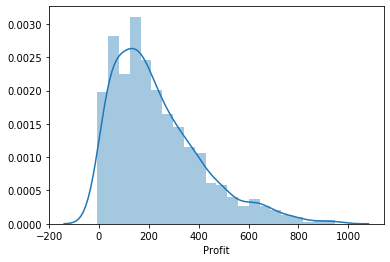

In [0]:
sns.distplot(df2.Profit)
